In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

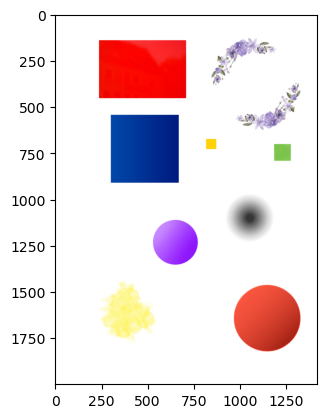

In [2]:
img = cv2.imread('img/img1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(img)


In [3]:
pixels = img.reshape((-1, 3))

In [4]:
kmeans=KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans.fit(pixels)
# Get cluster labels and dominant colors
labels = kmeans.labels_.reshape(img.shape[:2]) # Reshape labels back to image shape
dominant_colors = np.array(kmeans.cluster_centers_, dtype=int)  # Convert to int
print(dominant_colors)
# Convert back to BGR for OpenCV visualization
dominant_bgr_colors = [tuple(map(int, color[::-1])) for color in dominant_colors]

# Create a copy of the original image for visualization
output_image = img.copy()

[[254 254 254]
 [  2  49 145]
 [235  33  23]
 [155 158 156]
 [168  73 254]
 [253 243 144]]


In [5]:
for i, color in enumerate(dominant_colors):
    # Create a mask for the current cluster
    mask = (labels == i).astype(np.uint8) * 255  

    # Find contours to locate color positions
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small regions
            x, y, w, h = cv2.boundingRect(contour)
            
            # Draw bounding box around detected color region
            cv2.rectangle(output_image, (x, y), (x + w, y + h), dominant_bgr_colors[i], 2)
            cv2.putText(output_image, f"Color {i+1}", (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, dominant_bgr_colors[i], 2)

# Convert output image back to BGR for OpenCV displayx

In [ ]:
# Convert output image back to BGR for OpenCV display
output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)

# Show the result
cv2.imshow("Detected Colors and Positions", output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""
